In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc


from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
import warnings
warnings.filterwarnings('ignore')

In [158]:
data = pd.read_csv('NIH.csv')

In [159]:
data.head()

,id,abstract_text
0,8693991,Methamphetamine (MA) is remarkably addictive a...
1,8693362,Project Summary Risk bimarkers have become in...
2,8607498,DESCRIPTION (provided by applicant): Despi...
3,8697008,DESCRIPTION (provided by applicant): This ...
4,8725943,Antigen presenting cells (APCs) are critical f...


## Clean data

In [160]:
data['text_clean'] = data['abstract_text'].str.replace('[^a-zA-Z]', ' ')
data['text_clean'] = data['text_clean'].str.replace('  ', ' ')
data['text_clean'] = data['text_clean'].str.lower()
data['text_clean']

0     methamphetamine ma is remarkably addictive and...
1      project summary risk bimarkers have become in...
2       description provided by applicant  despite e...
3       description provided by applicant  this four...
4     antigen presenting cells apcs are critical for...
                            ...                        
95    the goal of the cancer disparities program cd ...
96      description provided by applicant  stroke is...
97      general description the center for environme...
98       qualifications roles of the po and pc this ...
99      description provided by applicant  this appl...
Name: text_clean, Length: 100, dtype: object

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [162]:
vectorizer = TfidfVectorizer(max_features=500,stop_words='english')
X = vectorizer.fit_transform(data['text_clean'])
print(vectorizer.get_feature_names())

['ability', 'acid', 'acids', 'activation', 'activities', 'activity', 'acute', 'adaptive', 'addition', 'additional', 'address', 'adhesion', 'administrative', 'africa', 'age', 'agents', 'aging', 'aim', 'aims', 'allow', 'alterations', 'analyses', 'analysis', 'animal', 'anti', 'antigen', 'antigens', 'applicant', 'application', 'approach', 'approaches', 'areas', 'art', 'arterial', 'assess', 'assessment', 'associated', 'available', 'based', 'basic', 'basis', 'battery', 'behavior', 'behavioral', 'binding', 'biological', 'biology', 'biomarkers', 'biomedical', 'blood', 'body', 'brafv', 'brain', 'breast', 'calpain', 'cancer', 'candidate', 'capacity', 'carbon', 'cardiovascular', 'career', 'cases', 'cause', 'cdk', 'cell', 'cells', 'cellular', 'center', 'central', 'centralized', 'change', 'changes', 'characterize', 'chemical', 'chronic', 'clinical', 'clinically', 'cmybp', 'cns', 'cognitive', 'combination', 'common', 'community', 'complex', 'component', 'components', 'composition', 'conditions', 'co

In [163]:
len(vectorizer.get_feature_names())

500

In [164]:
type(X)

scipy.sparse.csr.csr_matrix

In [165]:
tv_transformed = vectorizer.transform(data['text_clean'])

In [166]:
print(X.shape)

(100, 500)


In [167]:
tv_arr_source = tv_transformed.toarray()
tv_arr_source

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11234912, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.07161211,
        0.07161211],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07137107],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [171]:
# create document term matrix
df_dtm = pd.DataFrame(tv_transformed.toarray(), columns=vectorizer.get_feature_names())
df_dtm = df_dtm.add_prefix('tf_')

In [172]:
df_dtm

,tf_ability,tf_acid,tf_acids,tf_activation,tf_activities,tf_activity,tf_acute,tf_adaptive,tf_addition,tf_additional,...,tf_virus,tf_vitamin,tf_vitro,tf_vivo,tf_wall,tf_wide,tf_women,tf_work,tf_year,tf_years
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.085564,0.000000,0.028416,0.036498,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.076645,0.052830,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0.112349,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.148183,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.158782,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.032998,0.0,0.025091,0.027810,0.000000
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.211005,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.038260,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.040357
96,0.036021,0.0,0.0,0.041658,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.039495,0.0,0.000000,0.000000,0.000000
97,0.000000,0.0,0.0,0.000000,0.169944,0.0,0.000000,0.000000,0.067892,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.071612,0.071612
98,0.000000,0.0,0.0,0.000000,0.084686,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.071371


In [173]:
df_dtm.sum().sort_values(ascending=False)

tf_research    5.041169
tf_cells       3.938109
tf_cancer      3.203499
tf_core        3.180223
tf_health      3.150094
                 ...   
tf_examine     0.397432
tf_kda         0.392260
tf_fc          0.378525
tf_release     0.378142
tf_epsilon     0.351487
Length: 500, dtype: float64

## Hierachical clustering

In [174]:
tree = shc.linkage(df_dtm, method="ward", metric="euclidean")

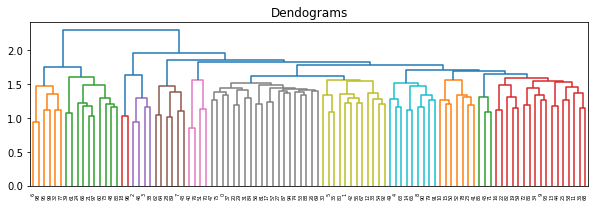

In [175]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 3))
plt.title("Dendograms")  
dend = shc.dendrogram(tree)

In [176]:
# cluster = 5
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean')
cluster.fit(tv_arr_source) # Fit the hierachical clustering on the data

AgglomerativeClustering(n_clusters=5)

In [177]:
data['Group_Hier'] = cluster.labels_

In [178]:
data.head()

,id,abstract_text,text_clean,Group_Hier
0,8693991,Methamphetamine (MA) is remarkably addictive a...,methamphetamine ma is remarkably addictive and...,0
1,8693362,Project Summary Risk bimarkers have become in...,project summary risk bimarkers have become in...,0
2,8607498,DESCRIPTION (provided by applicant): Despi...,description provided by applicant despite e...,2
3,8697008,DESCRIPTION (provided by applicant): This ...,description provided by applicant this four...,2
4,8725943,Antigen presenting cells (APCs) are critical f...,antigen presenting cells apcs are critical for...,0


In [207]:
# Tao text tu cot abstract_text
text_0 = ""
abstract_text_0 = data.loc[data['Group_Hier']==0, ['text_clean']]
abstract_text_0 = abstract_text_0['text_clean']
for i in abstract_text_0:
    text_0 = text_0 + " " + i

In [208]:
text_1 = ""
abstract_text_1 = data.loc[data['Group_Hier']==1, ['text_clean']]
abstract_text_1 = abstract_text_1['text_clean']
for i in abstract_text_1:
    text_1 = text_1 + " " + i

In [209]:
text_2 = ""
abstract_text_2 = data.loc[data['Group_Hier']==2, ['text_clean']]
abstract_text_2 = abstract_text_2['text_clean']
for i in abstract_text_2:
    text_2 = text_2 + " " + i

In [210]:
text_3 = ""
abstract_text_3 = data.loc[data['Group_Hier']==3, ['text_clean']]
abstract_text_3 = abstract_text_3['text_clean']
for i in abstract_text_3:
    text_3 = text_3 + " " + i

In [211]:
text_4 = ""
abstract_text_4 = data.loc[data['Group_Hier']==4, ['text_clean']]
abstract_text_4 = abstract_text_4['text_clean']
for i in abstract_text_4:
    text_4 = text_4 + " " + i

In [229]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('will')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


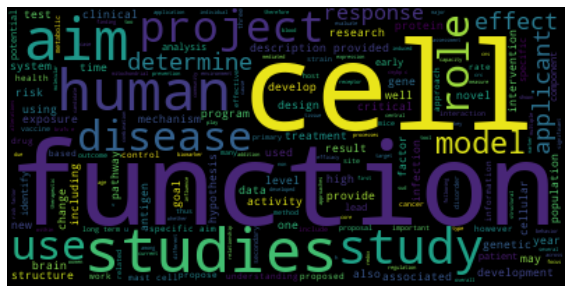

In [230]:
# Bieu do WordCloud

plt.figure(figsize=(10,10))
wc_text_0=WordCloud(stopwords=stopwords)
wc_text_0.generate(text_0)
plt.imshow(wc_text_0,interpolation="bilinear")
plt.axis("off")
plt.show()

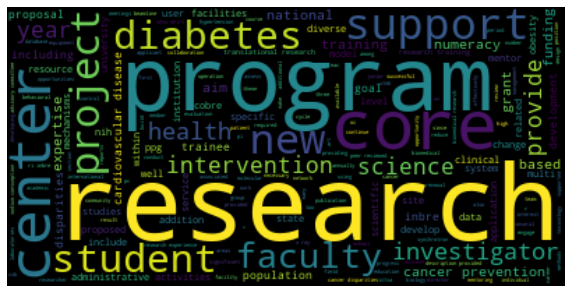

In [231]:
plt.figure(figsize=(10,10))
wc_text_1=WordCloud(stopwords=stopwords)
wc_text_1.generate(text_1)
plt.imshow(wc_text_1,interpolation="bilinear")
plt.axis("off")
plt.show()

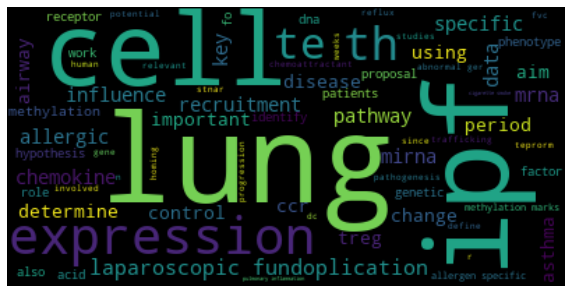

In [232]:
plt.figure(figsize=(10,10))
wc_text_4=WordCloud(stopwords=stopwords)
wc_text_4.generate(text_4)
plt.imshow(wc_text_4,interpolation="bilinear")
plt.axis("off")
plt.show()

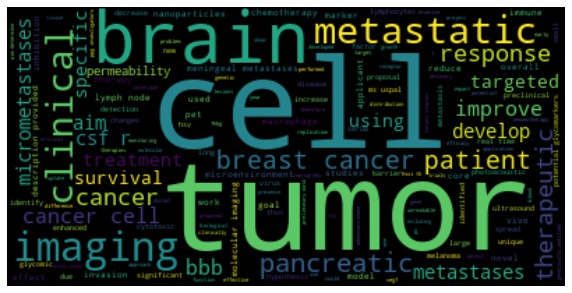

In [233]:
plt.figure(figsize=(10,10))
wc_text_3=WordCloud(stopwords=stopwords)
wc_text_3.generate(text_3)
plt.imshow(wc_text_3,interpolation="bilinear")
plt.axis("off")
plt.show()

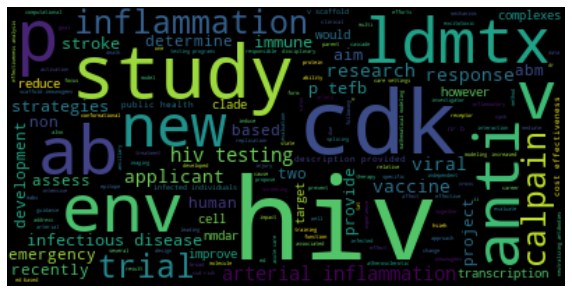

In [234]:
plt.figure(figsize=(10,10))
wc_text_2=WordCloud(stopwords=stopwords)
wc_text_2.generate(text_2)
plt.imshow(wc_text_2,interpolation="bilinear")
plt.axis("off")
plt.show()

## K-Mean

In [199]:
wsses = [] # chua WSSE tuong ung
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k) # so cum
    kmeanModel = kmeanModel.fit(df_dtm)
    wsses.append(kmeanModel.inertia_)

In [200]:
wsses

[92.80605167830807,
 90.02103285626231,
 88.64215920348313,
 86.73338753051692,
 85.87521675902703,
 84.4322169239083,
 83.0838146241365,
 81.40975913248568,
 80.0559152824267,
 78.51372566227235,
 77.88103148898345,
 76.24312459691681,
 75.03282356611089,
 74.01569418933171,
 72.40857335752642,
 71.08611384205817,
 70.20844131424607,
 68.9878346363398,
 67.48347081671389]

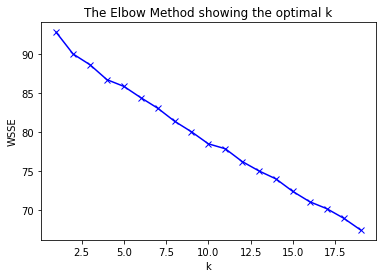

In [201]:
# Truc quan elbow
plt.plot(K, wsses, 'bx-')
plt.xlabel('k')
plt.ylabel('WSSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [202]:
# Ap dung k = 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_dtm)

KMeans(n_clusters=5)

In [203]:
data['Group_Kmeans'] = pd.Series(kmeans.labels_)
data.head()

,id,abstract_text,text_clean,Group_Hier,Group_Kmeans
0,8693991,Methamphetamine (MA) is remarkably addictive a...,methamphetamine ma is remarkably addictive and...,0,1
1,8693362,Project Summary Risk bimarkers have become in...,project summary risk bimarkers have become in...,0,3
2,8607498,DESCRIPTION (provided by applicant): Despi...,description provided by applicant despite e...,2,4
3,8697008,DESCRIPTION (provided by applicant): This ...,description provided by applicant this four...,2,4
4,8725943,Antigen presenting cells (APCs) are critical f...,antigen presenting cells apcs are critical for...,0,3


In [204]:
tv_df_source = pd.concat([data[['Group_Hier','Group_Kmeans']], df_dtm], axis=1)
tv_df_source.head()

,Group_Hier,Group_Kmeans,tf_ability,tf_acid,tf_acids,tf_activation,tf_activities,tf_activity,tf_acute,tf_adaptive,...,tf_virus,tf_vitamin,tf_vitro,tf_vivo,tf_wall,tf_wide,tf_women,tf_work,tf_year,tf_years
0,0,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.085564,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
1,0,3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.076645,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
2,2,4,0.112349,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.148183,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
3,2,4,0.000000,0.0,0.0,0.0,0.0,0.0,0.158782,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.032998,0.0,0.025091,0.02781,0.0
4,0,3,0.000000,0.0,0.0,0.0,0.0,0.0,0.211005,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0


In [221]:
for i in range(0,5):
    print("group: " , i , "\n")
    print(tv_df_source[tv_df_source['Group_Hier']==i].iloc[:, 3:].sum(axis=0).sort_values(ascending=False)[:15])
    print("\n")

group:  0 

tf_cells       2.492639
tf_provided    2.467779
tf_data        2.206701
tf_genetic     2.179083
tf_aim         2.168130
tf_health      2.147885
tf_studies     2.100689
tf_use         2.087165
tf_study       2.083614
tf_cell        2.080366
tf_project     2.058151
tf_brain       2.035271
tf_activity    1.972152
tf_function    1.946248
tf_disease     1.914211
dtype: float64


group:  1 

tf_research          3.214808
tf_core              2.210948
tf_center            1.666633
tf_program           1.330198
tf_diabetes          1.267549
tf_support           1.164705
tf_disparities       1.130551
tf_training          1.124746
tf_inbre             1.085675
tf_cancer            1.075346
tf_students          1.035127
tf_administrative    1.007084
tf_investigators     1.000421
tf_faculty           0.944088
tf_cores             0.860013
dtype: float64


group:  2 

tf_hiv              2.331027
tf_cdk              1.367550
tf_env              1.017894
tf_inflammation     0.579923
tf_v

In [222]:
for i in range(0,5):
    print("group: " , i , "\n")
    print(tv_df_source[tv_df_source['Group_Kmeans']==i].iloc[:, 3:].sum(axis=0).sort_values(ascending=False)[:15])
    print("\n")

group:  0 

tf_ipf              1.395969
tf_lung             1.381367
tf_th               1.349987
tf_sleep            0.766168
tf_ptc              0.686788
tf_diabetes         0.615028
tf_numeracy         0.604237
tf_redox            0.598341
tf_cells            0.558516
tf_brafv            0.530700
tf_ros              0.479284
tf_methylation      0.437414
tf_vegfr            0.405829
tf_mitochondrial    0.372776
tf_memory           0.346353
dtype: float64


group:  1 

tf_provided     2.004887
tf_genetic      1.788624
tf_disease      1.600764
tf_signaling    1.554812
tf_factors      1.511912
tf_infection    1.510874
tf_activity     1.481967
tf_cns          1.407277
tf_aim          1.355659
tf_determine    1.343349
tf_acids        1.322799
tf_cell         1.278503
tf_studies      1.253432
tf_neuronal     1.250582
tf_neural       1.245377
dtype: float64


group:  2 

tf_research          3.694500
tf_core              2.455351
tf_center            1.833036
tf_health            1.780104


In [223]:
data.head()

,id,abstract_text,text_clean,Group_Hier,Group_Kmeans
0,8693991,Methamphetamine (MA) is remarkably addictive a...,methamphetamine ma is remarkably addictive and...,0,1
1,8693362,Project Summary Risk bimarkers have become in...,project summary risk bimarkers have become in...,0,3
2,8607498,DESCRIPTION (provided by applicant): Despi...,description provided by applicant despite e...,2,4
3,8697008,DESCRIPTION (provided by applicant): This ...,description provided by applicant this four...,2,4
4,8725943,Antigen presenting cells (APCs) are critical f...,antigen presenting cells apcs are critical for...,0,3


In [225]:
text_0_Kmeans = ""
abstract_text_0_Kmeans = data.loc[data['Group_Kmeans']==0, ['text_clean']]
abstract_text_0_Kmeans = abstract_text_0_Kmeans['text_clean']
for i in abstract_text_0_Kmeans:
    text_0_Kmeans = text_0_Kmeans + " " + i

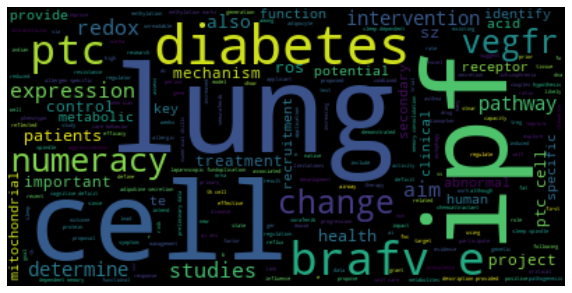

In [235]:
# Bieu do WordCloud
plt.figure(figsize=(10,10))
wc_text_0_Kmeans =WordCloud(stopwords=stopwords)
wc_text_0_Kmeans.generate(text_0_Kmeans)
plt.imshow(wc_text_0_Kmeans,interpolation="bilinear")
plt.axis("off")
plt.show()

### Theo 2 mô hình K-mean và Hierachical clustering, có 5 cụm
1. Cụm 1 (Lung-Cell-ipf)
2. Cụm 2 (Brain-Cell-tumor)
3. Cụm 3 (HIV - RNA)
4. Cụm 4 ( Research- studies - training)
5. Cụm 5  (Cell- Function)